In [43]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
            if(pkt[TCP].sport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                plc_cube.append(np.asarray([s_ip,d_ip,d_time]))

In [44]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dex2019_0002_attack3.pcap', prn=packet_analysis, store=0, count=100000)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [45]:
print(hmi_cube.shape)
print(plc_cube.shape)
print(plc_cube[2][0])
dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
dst2 = dst1[dst1[:,1]==[ip2long('192.168.1.20')]]
normal_hmi = dst2[:,2]

(7741, 3)
(7721, 3)
3232235826.0


In [46]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
            if(pkt[TCP].sport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                plc_cube.append(np.asarray([s_ip,d_ip,d_time]))

In [47]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dec2019_00000_20191206100500.pcap', prn=packet_analysis, store=0, count=100000)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [48]:
_dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
_dst2 = _dst1[_dst1[:,1]==[ip2long('192.168.1.20')]]
attack_hmi = _dst2[:,2]

In [49]:
print("normal HMI",normal_hmi.shape)
print("attack HMI",attack_hmi.shape)
print(max(normal_hmi)-min(normal_hmi))

normal HMI (959,)
attack HMI (1009,)
3.9717819690704346


In [50]:
normal_hmi_diff = np.diff(normal_hmi)
#normal_plc_diff = np.diff(normal_plc)
attack_hmi_diff = np.diff(attack_hmi)
#attack_plc_diff = np.diff(attack_plc)

1.0
1.0
[0.1672133  0.04595869 0.04482723 0.00747987]
[0.29512232 0.10932802 0.05440958 0.03987795 0.00810557]
1.0
1.0
[0.10082796 0.05846382 0.05071609 0.00769026]
[0.26308795 0.18396038 0.09319206 0.0073201  0.00787227 0.00788101]
1.0
1.0
[0.25096966 0.1947713  0.06335954 0.02007825 0.01349283]
[0.22929235 0.10313556 0.10753762 0.02214139 0.05637695 0.01592033
 0.00955741]
1.0000000000000002
1.0
[0.09160202 0.10288642 0.05763739 0.02671513 0.01727802 0.01455195
 0.01168455 0.01029336]
[0.12275393 0.07861943 0.06398702 0.02607036 0.00735827]
1.0000000000000002
1.0
[0.12990954 0.09274024 0.05460304 0.03321327 0.01321759]
[0.23282771 0.13242964 0.08307786 0.00809878 0.0162991  0.00789856]


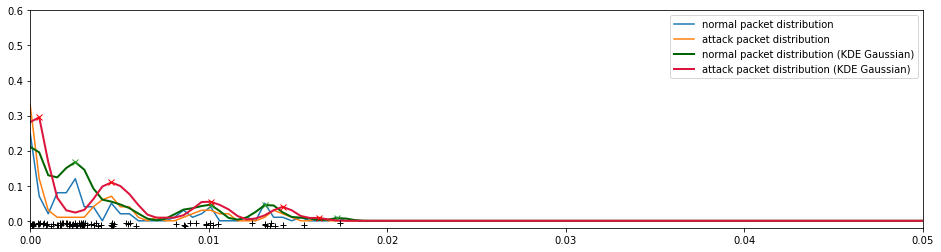

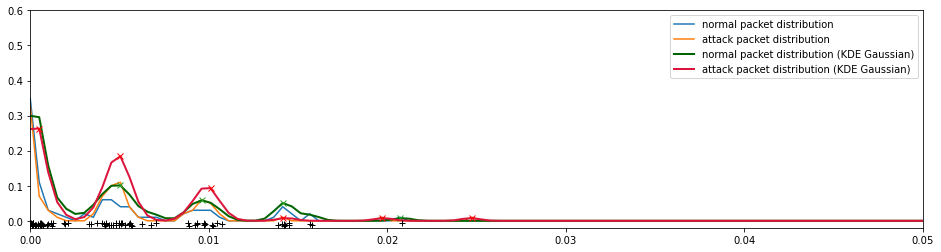

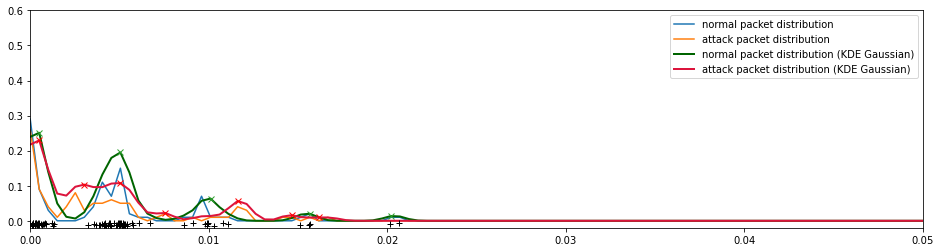

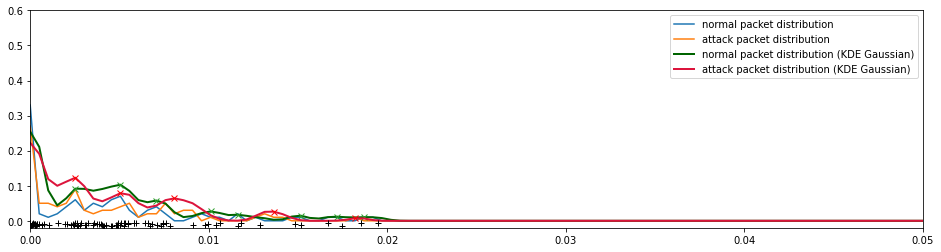

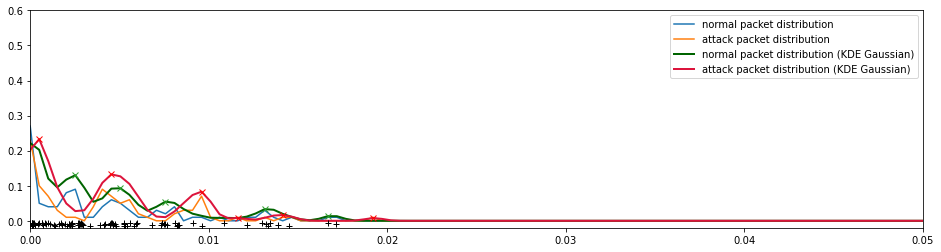

In [51]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example
for k in range(5):
    
    maxrange = 0.05
    N = 100
    fold = k*N
    np.random.seed(1)
    #X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
    #                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
    X = normal_hmi_diff[fold:fold+N].reshape(-1,1)
    X_beta = attack_hmi_diff[fold:fold+N].reshape(-1,1)
    X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

    #true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
    #             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

    hist, bin_edges = np.histogram(normal_hmi_diff[fold:fold+N], bins=N, range=(0.0,maxrange), density=True)
    bin_edges = bin_edges[:-1]
    true_dens = hist[:]*maxrange*(1/N)
    #print(true_dens)
    print(np.sum(true_dens))

    _hist, _bin_edges = np.histogram(attack_hmi_diff[fold:fold+N], bins=N, range=(0.0,maxrange), density=True)
    _bin_edges = _bin_edges[:-1]
    _true_dens = _hist[:]*maxrange*(1/N)
    #print(_true_dens)
    print(np.sum(_true_dens))

    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution')
    ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution')

    kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
    log_dens = kde.score_samples(X_plot)
    dens = np.exp(log_dens)/1000
    peaks, _ = find_peaks(dens, height=0.001)

    _kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
    _log_dens = _kde.score_samples(X_plot)
    _dens = np.exp(_log_dens)/1000
    _peaks, __ = find_peaks(_dens, height=0.001)

    ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
            linestyle='-', label='normal packet distribution (KDE Gaussian)')
    ax.plot(X_plot[peaks],dens[peaks], "x")
    ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
            linestyle='-', label='attack packet distribution (KDE Gaussian)')
    ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
    print(dens[peaks])
    print(_dens[_peaks])
    #ax.text(6, 0.38, "N={0} points".format(N))
    ax.legend(loc='upper right')
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-0.0, maxrange)
    ax.set_ylim(-0.02, 0.6)
